#Image Classification Lab

###For this lab I will be using the CIFAR-10 dataset to classify 10000 test images in one of the following categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The dataset contians 50000 2x32 colour images for training.

In [1]:
import keras
import tensorflow as tf
#Load dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [2]:
#Preprocess data

train_images = train_images.astype('float32') / 255

test_images = test_images.astype('float32') / 255

In [3]:
from keras.utils import to_categorical
#One-hot encode data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [4]:
#Build network
from keras import models
from keras import layers

input_size= 1024 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

####I will use the same first training model we used in the "Deep Learning Lab"

In [6]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 8s 3ms/step - loss: 2.1630 - accuracy: 0.2662
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 1.8142 - accuracy: 0.3509
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.7362 - accuracy: 0.3820
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 1.6907 - accuracy: 0.4017
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.6535 - accuracy: 0.4155


####We can also check to see if our model performs with similar accuracy on our test dataset

In [7]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.6786 - accuracy: 0.4043


###We received a 41.55% accuracy on our training data and 40.43% accuracy on our test data. For that model we were using 5 epochs, but the accuracy was improving with each epoch. We also used a batch size of 128 for that training, but we did not fill the system memory, so lets build, compile, and fit a new model with increased epochs and batch size in an attempt to increase accuracy.

In [8]:
#Build network
from keras import models
from keras import layers

input_size= 1024 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
network.fit(train_images, train_labels, epochs=15, batch_size=200)

Epoch 1/15
250/250 [==============================] - 1s 3ms/step - loss: 2.2266 - accuracy: 0.2488
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 1.8605 - accuracy: 0.3321
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 1.7757 - accuracy: 0.3667
Epoch 4/15
250/250 [==============================] - 1s 3ms/step - loss: 1.7152 - accuracy: 0.3889
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 1.6754 - accuracy: 0.4067
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 1.6402 - accuracy: 0.4191
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - loss: 1.6124 - accuracy: 0.4294
Epoch 8/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5885 - accuracy: 0.4384
Epoch 9/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5687 - accuracy: 0.4428
Epoch 10/15
250/250 [==============================] - 1s 3ms/step - loss: 1.5531 - accuracy: 0.4498

###From that model we see an increase in accuracy from 41% to 47%. After doing some research, I am interested in using a smaller batch size to require more passes per epoch, as well as an increased number of epochs, to hopefully obtain a higher accuracy.

In [11]:
#Build network
from keras import models
from keras import layers

input_size= 1024 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
network.fit(train_images, train_labels, epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6007 - accuracy: 0.4334
Epoch 2/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5663 - accuracy: 0.4488
Epoch 3/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5415 - accuracy: 0.4590
Epoch 4/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5248 - accuracy: 0.4661
Epoch 5/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5036 - accuracy: 0.4720
Epoch 6/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4909 - accuracy: 0.4773
Epoch 7/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4800 - accuracy: 0.4825
Epoch 8/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4628 - accuracy: 0.4885
Epoch 9/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4559 - accuracy: 0.4918
Epoch 10/25
1563/1563 [==============================] - 4s 2ms/step - loss: 1.442

###The use of 25 epochs and a batch size of 32 resulted in a 53.36% accuracy rate, we are continuing to improve!

###I would also like to experiment with adding a second hidden layer to the network and slightly increasing batch size in order to increase epoch size quite a bit. 

In [15]:
#Build the network
from keras import models
from keras import layers

input_size=1024 
hidden_size = [512, 256]
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(hidden_size[0], activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(hidden_size[1], activation='relu'))
network.add(layers.Dense(output_size, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
network.fit(train_images, train_labels, epochs=50, batch_size=64)

Epoch 1/50
782/782 [==============================] - 3s 3ms/step - loss: 1.9835 - accuracy: 0.2981
Epoch 2/50
782/782 [==============================] - 2s 3ms/step - loss: 1.7168 - accuracy: 0.3829
Epoch 3/50
782/782 [==============================] - 2s 3ms/step - loss: 1.6323 - accuracy: 0.4179
Epoch 4/50
782/782 [==============================] - 2s 3ms/step - loss: 1.5789 - accuracy: 0.4352
Epoch 5/50
782/782 [==============================] - 2s 3ms/step - loss: 1.5392 - accuracy: 0.4532
Epoch 6/50
782/782 [==============================] - 2s 3ms/step - loss: 1.5055 - accuracy: 0.4643
Epoch 7/50
782/782 [==============================] - 2s 3ms/step - loss: 1.4796 - accuracy: 0.4759
Epoch 8/50
782/782 [==============================] - 2s 3ms/step - loss: 1.4556 - accuracy: 0.4828
Epoch 9/50
782/782 [==============================] - 2s 3ms/step - loss: 1.4373 - accuracy: 0.4889
Epoch 10/50
782/782 [==============================] - 2s 3ms/step - loss: 1.4216 - accuracy: 0.4963

###We have increased accuracy to 56.67%, but lets check how the model performs on the test data to get more information.

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.1179 - accuracy: 0.4341


###Our model only had a 43% accuracy on the test data, meaning it is overfitting the data. I think adding the additional hidden layer increased complexity and caused the overfitting. I will remove that layer, add a validation set, and visualize the data to check for overfitting.

In [33]:
#Load dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [34]:
#Preprocess data

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [35]:
from keras.utils import to_categorical
#One-hot encode data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [42]:
#Build network
from keras import models
from keras import layers

input_size= 1024 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

In [43]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [89]:
history = network.fit(train_images, train_labels, validation_split=0.33, epochs=25, batch_size=32)

Epoch 1/25
943/943 [==============================] - 4s 4ms/step - loss: 2.0388 - accuracy: 0.2742 - val_loss: 1.9005 - val_accuracy: 0.3203
Epoch 2/25
943/943 [==============================] - 3s 3ms/step - loss: 1.8403 - accuracy: 0.3382 - val_loss: 1.8347 - val_accuracy: 0.3238
Epoch 3/25
943/943 [==============================] - 3s 3ms/step - loss: 1.7902 - accuracy: 0.3609 - val_loss: 1.7577 - val_accuracy: 0.3573
Epoch 4/25
943/943 [==============================] - 3s 3ms/step - loss: 1.7592 - accuracy: 0.3700 - val_loss: 1.7608 - val_accuracy: 0.3707
Epoch 5/25
943/943 [==============================] - 3s 3ms/step - loss: 1.7375 - accuracy: 0.3769 - val_loss: 1.7808 - val_accuracy: 0.3624
Epoch 6/25
943/943 [==============================] - 3s 3ms/step - loss: 1.7274 - accuracy: 0.3821 - val_loss: 1.6967 - val_accuracy: 0.3879
Epoch 7/25
943/943 [==============================] - 3s 3ms/step - loss: 1.7114 - accuracy: 0.3898 - val_loss: 1.8767 - val_accuracy: 0.3264
Epoch 

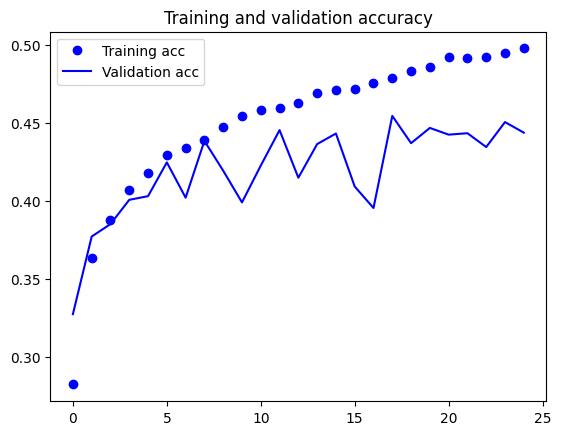

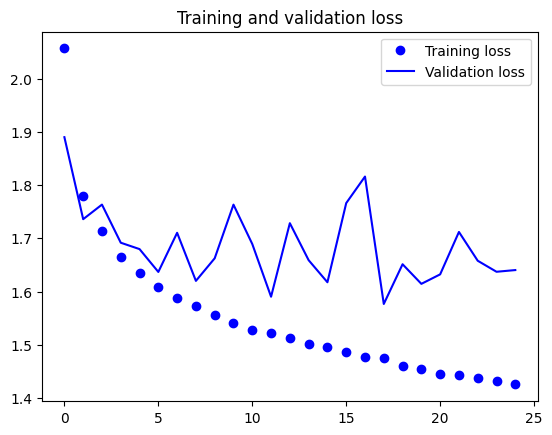

In [45]:
#Plot training and validation accuracy and loss side by side
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##From the above graphs some overfitting is occuring, but let's check the model accuracy on the test data.

In [90]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.6689 - accuracy: 0.4180


###Although our accuracy score is decreased from previous models, the training data and test data accuracy are more similar (42.2% and 41.8%), so we have solved some of our overfitting. I will adjust the epoch and batch size again and add a droupout layer to attempt to increase accuracy.

In [93]:
#Build network
from keras import models
from keras import layers

input_size= 1024 
hidden_size = 256
output_size = 10

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
network.add(layers.Dense(output_size, activation='softmax'))

In [94]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [95]:
history = network.fit(train_images, train_labels, validation_split=0.33, epochs=50, batch_size=64)

Epoch 1/50
472/472 [==============================] - 3s 4ms/step - loss: 2.1319 - accuracy: 0.2546 - val_loss: 2.4197 - val_accuracy: 0.2018
Epoch 2/50
472/472 [==============================] - 2s 4ms/step - loss: 1.8607 - accuracy: 0.3322 - val_loss: 1.9940 - val_accuracy: 0.2822
Epoch 3/50
472/472 [==============================] - 2s 4ms/step - loss: 1.7962 - accuracy: 0.3602 - val_loss: 2.0023 - val_accuracy: 0.2976
Epoch 4/50
472/472 [==============================] - 2s 4ms/step - loss: 1.7588 - accuracy: 0.3704 - val_loss: 1.8429 - val_accuracy: 0.3532
Epoch 5/50
472/472 [==============================] - 2s 4ms/step - loss: 1.7370 - accuracy: 0.3782 - val_loss: 1.9586 - val_accuracy: 0.3098
Epoch 6/50
472/472 [==============================] - 2s 4ms/step - loss: 1.7135 - accuracy: 0.3894 - val_loss: 1.7742 - val_accuracy: 0.3785
Epoch 7/50
472/472 [==============================] - 2s 4ms/step - loss: 1.7014 - accuracy: 0.3969 - val_loss: 1.8380 - val_accuracy: 0.3534
Epoch 

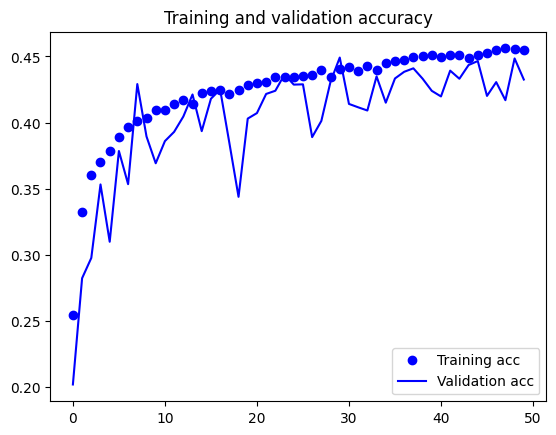

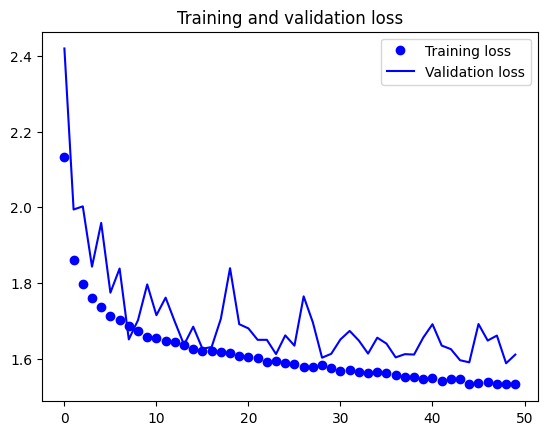

In [96]:
#Plot training and validation accuracy and loss side by side
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Visualization seems to show less overfitting, lets check test accuracy again.

In [98]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5685 - accuracy: 0.4507


###I received a training accuracy of 45.52 and test accuracy of 45.07. I was able to reduce overfitting through decreasing the number of hidden layers (complexity) in the model, adding a dropout layer, and using a batch size of 64 with 50 epochs in my final model.